Generate blank grid: python scripts/master_grid_blank_v3.py → outputs figures/master_grid_blank_v3.png

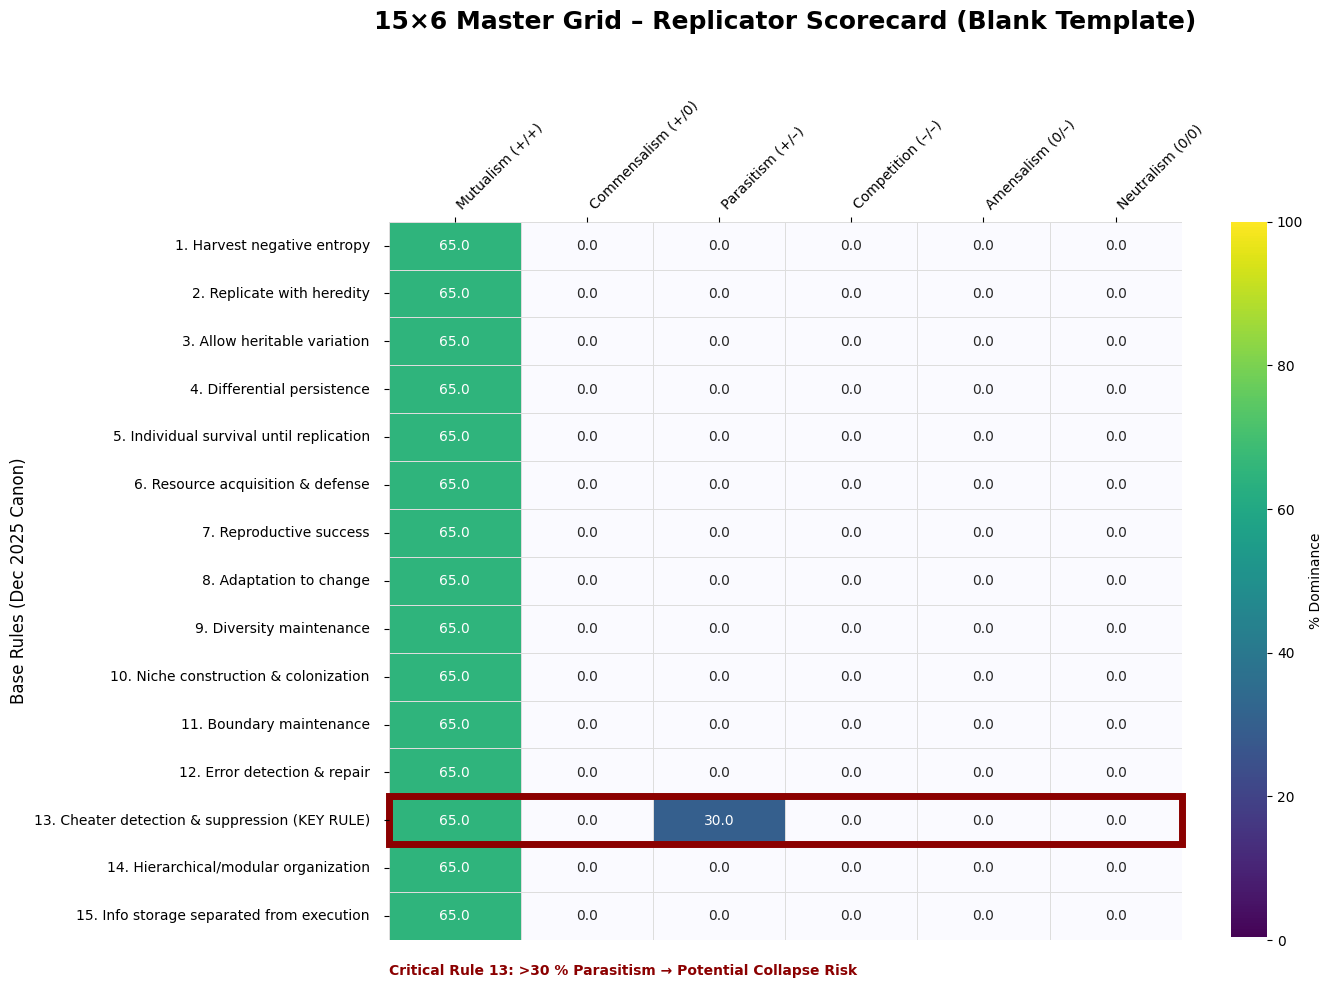

Saved: master_grid_blank_v4.png


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# ────────────────────────────────────────────────
# 1. CANONICAL LABELS (clean, no trailing dashes)
# ────────────────────────────────────────────────
rules = [
    "1. Harvest negative entropy",
    "2. Replicate with heredity",
    "3. Allow heritable variation",
    "4. Differential persistence",
    "5. Individual survival until replication",
    "6. Resource acquisition & defense",
    "7. Reproductive success",
    "8. Adaptation to change",
    "9. Diversity maintenance",
    "10. Niche construction & colonization",
    "11. Boundary maintenance",
    "12. Error detection & repair",
    "13. Cheater detection & suppression (KEY RULE)",
    "14. Hierarchical/modular organization",
    "15. Info storage separated from execution"
]

moves = [
    "Mutualism (+/+)",
    "Commensalism (+/0)",
    "Parasitism (+/–)",
    "Competition (–/–)",
    "Amensalism (0/–)",
    "Neutralism (0/0)"
]

# ────────────────────────────────────────────────
# 2. SELECTIVE BLANK MATRIX (only key cells filled for emphasis)
# ────────────────────────────────────────────────
blank_matrix = np.zeros((15, 6))
# Baseline mutualism column fill (to show structure without full saturation)
blank_matrix[:, 0] = 65.0  # Mutualism column as "starting energy"
# Highlight Rule 13 with selective parasitism value (provisional example)
blank_matrix[12, 2] = 30.0  # Just at threshold for visual cue

blank_df = pd.DataFrame(blank_matrix, index=rules, columns=moves)

# ────────────────────────────────────────────────
# 3. STYLING
# ────────────────────────────────────────────────
viridis_base = mpl.colormaps["viridis"]
newcolors = viridis_base(np.linspace(0, 1, 256))
newcolors[0, :] = [0.98, 0.98, 1, 1]  # Very light tint at zero
custom_map = LinearSegmentedColormap.from_list('FullSaturation', newcolors)
oxford_red = "#8B0000"

# ────────────────────────────────────────────────
# 4. PLOTTING (Single blank template)
# ────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(blank_df, annot=True, fmt=".1f", cmap=custom_map, vmin=0, vmax=100,
            linewidths=0.5, linecolor="#dddddd", cbar_kws={'label': '% Dominance', 'pad': 0.05}, ax=ax)

ax.set_title("15×6 Master Grid – Replicator Scorecard (Blank Template)", fontsize=18, pad=50, fontweight='bold')
ax.set_ylabel("Base Rules (Dec 2025 Canon)", fontsize=12)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha="left", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
ax.tick_params(axis='y', which='major', pad=10)

# Rule 13 red border
ax.add_patch(plt.Rectangle((0, 12), 6, 1, fill=False, edgecolor=oxford_red, lw=5, clip_on=False))

# Provisional note at bottom (aligned left, below grid)
ax.text(0, 15.5, "Critical Rule 13: >30 % Parasitism → Potential Collapse Risk",
        fontsize=10, color=oxford_red, ha='left', va='top', fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.savefig("master_grid_blank_v4.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: master_grid_blank_v4.png")